# Car sales in Norway monthly EDA


a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [9]:
import pandas as pd

df = pd.read_csv("../../data/norway_new_car_sales_by_month.csv")

df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [10]:
df.info() # summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [11]:
df.shape # display the shape of the dataset

(121, 17)

In [12]:
df.isnull().sum()  # check for missing values in the dataset

Year                  0
Month                 0
Quantity              0
Quantity_YoY          0
Import                0
Import_YoY            0
Used                 60
Used_YoY             72
Avg_CO2               0
Bensin_Co2            0
Diesel_Co2            0
Quantity_Diesel       0
Diesel_Share          0
Diesel_Share_LY       0
Quantity_Hybrid      48
Quantity_Electric    48
Import_Electric      68
dtype: int64

In [13]:
df.sort_values(by="Year", ascending=False)


,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
120,2017,1,13055,2064,1549,330,36078.0,4047.0,84,94,118,3433,26.3,38.0,4419.0,2295.0,494.0
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
110,2016,3,13875,-284,1253,-803,36172.0,-5255.0,88,117,131,4745,34.2,41.4,3396.0,2597.0,465.0
108,2016,1,10991,468,1219,-406,32085.0,-6261.0,96,117,130,4177,38.0,43.7,1992.0,1906.0,404.0
112,2016,5,12864,828,1432,-423,36272.0,-392.0,96,116,129,3872,30.1,41.2,3449.0,1423.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2007,10,11646,2973,3185,597,NaN,NaN,159,160,159,8967,77.0,48.3,NaN,NaN,NaN
8,2007,9,9340,498,2897,-28,NaN,NaN,160,160,160,7005,75.0,50.5,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN


In [14]:
import duckdb as db

# making a query that groups quantity by year and checks if full year is accounted.
df_quantity_by_year = db.query(
"""
        SELECT
        Year, 
        COUNT(Month) as Total_months,
        SUM(Quantity) as Total_quantity
        FROM
        df
        GROUP BY
        Year, 
        HAVING
        Total_months
        = 12
        ORDER BY
        Year ASC
""").df()

df_quantity_by_year

,Year,Total_months,Total_quantity
0,2007,12,129195.0
1,2008,12,110617.0
2,2009,12,98675.0
3,2010,12,127754.0
4,2011,12,138345.0
5,2012,12,137967.0
6,2013,12,142151.0
7,2014,12,144202.0
8,2015,12,150686.0
9,2016,12,154603.0


b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

skipped year 2017 since its not a full 12 months of data.

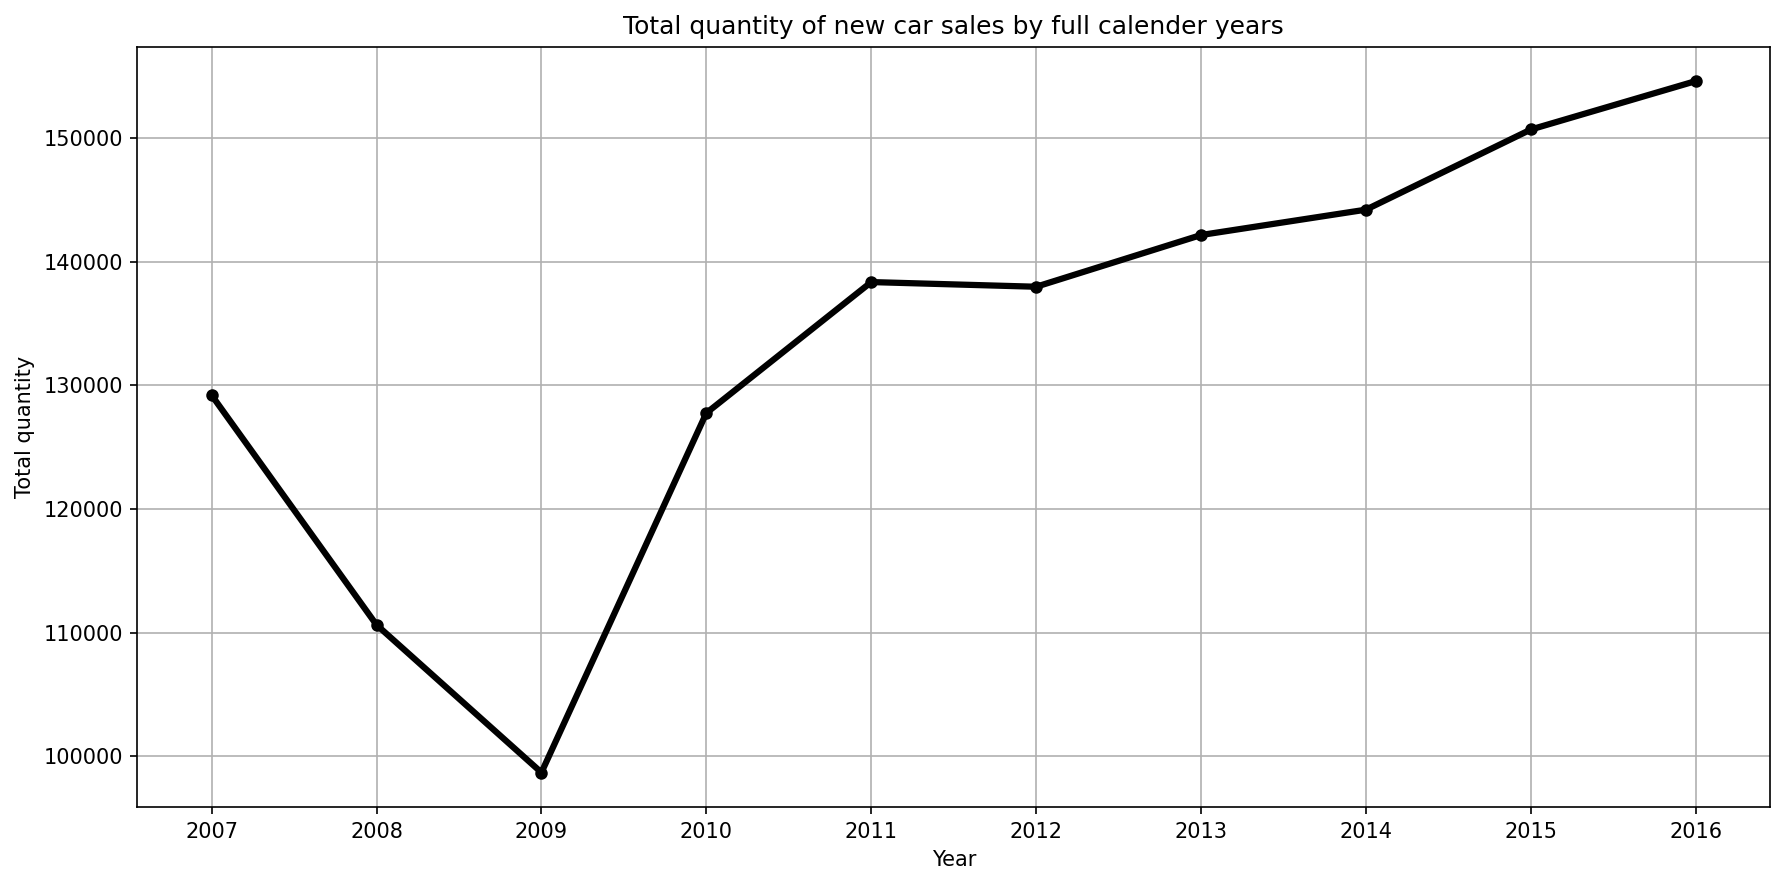

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

plt.grid(True)
plt.xticks(df_quantity_by_year["Year"])
ax.plot(df_quantity_by_year["Year"], df_quantity_by_year["Total_quantity"], 
        marker="o", 
        linestyle="-", 
        color="black", 
        linewidth=3, 
        markersize=5)
ax.set(xlabel="Year", 
       ylabel="Total quantity", 
       title="Total quantity of new car sales by full calender years")
plt.tight_layout()
fig.savefig("sales_quantity_by_year.png")


c) Draw a line chart of average CO2 emissions for same years that as in b)

In [ ]:
df_avg_co2_by_year = db.query(
"""
        SELECT
        Year, 
        COUNT(Month) as Total_months,
        AVG(Avg_CO2) as Avg_co2
        FROM
        df
        GROUP BY
        Year, 
        HAVING
        Total_months
        = 12
        ORDER BY
        Year ASC
""").df()

df_avg_co2_by_year

,Year,Total_months,avg_co2
0,2007,12,159.000000
1,2008,12,158.000000
2,2009,12,150.916667
3,2010,12,140.666667
4,2011,12,134.000000
5,2012,12,129.916667
6,2013,12,123.000000
7,2014,12,110.416667
8,2015,12,99.750000
9,2016,12,93.333333
